Question: What are the top 3 Job titles per year

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

# File Path
file_path = r"C:\Users\Thomas\Desktop\Finished Projects\Project 7\Group-Project-1\Resources\jobs_in_data.csv"

# CSV to Dataframe
df = pd.read_csv(file_path)

# Display
print(df.head())

   work_year             job_title                    job_category  \
0       2023  Data DevOps Engineer                Data Engineering   
1       2023        Data Architect  Data Architecture and Modeling   
2       2023        Data Architect  Data Architecture and Modeling   
3       2023        Data Scientist       Data Science and Research   
4       2023        Data Scientist       Data Science and Research   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR   88000          95012            Germany        Mid-level   
1             USD  186000         186000      United States           Senior   
2             USD   81800          81800      United States           Senior   
3             USD  212000         212000      United States           Senior   
4             USD   93300          93300      United States           Senior   

  employment_type work_setting company_location company_size  
0       Full-time       Hybrid     

In [52]:
# Check data shape
print("Original:", df.shape)

# Remove duplicates
df = df.drop_duplicates()

# Check the shape after removing duplicates
print("After duplicates drop:", df.shape)

# Check for duplicated rows
duplicated_rows = df[df.duplicated()]
print("Duplicated rows:")
print(duplicated_rows)



Original: (9355, 12)
After duplicates drop: (5341, 12)
Duplicated rows:
Empty DataFrame
Columns: [work_year, job_title, job_category, salary_currency, salary, salary_in_usd, employee_residence, experience_level, employment_type, work_setting, company_location, company_size]
Index: []


In [53]:
#Look for missing values
df.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [54]:
# distribution of job titles
print(df['job_title'].value_counts())

# distribution of work years
print(df['work_year'].value_counts())


job_title
Data Engineer                    1100
Data Scientist                   1039
Data Analyst                      744
Machine Learning Engineer         518
Analytics Engineer                207
                                 ... 
Deep Learning Researcher            1
Analytics Engineering Manager       1
BI Data Engineer                    1
Power BI Developer                  1
Marketing Data Engineer             1
Name: count, Length: 125, dtype: int64
work_year
2023    3980
2022    1095
2021     195
2020      71
Name: count, dtype: int64


In [55]:
# Years of data
total_years = df['work_year'].nunique()
print(f"Total years of data: {total_years}")

# Table
table = df[['work_year', 'job_title']]
print(table)

Total years of data: 4
      work_year                 job_title
0          2023      Data DevOps Engineer
1          2023            Data Architect
2          2023            Data Architect
3          2023            Data Scientist
4          2023            Data Scientist
...         ...                       ...
9350       2021           Data Specialist
9351       2020            Data Scientist
9352       2021  Principal Data Scientist
9353       2020            Data Scientist
9354       2020     Business Data Analyst

[5341 rows x 2 columns]


In [56]:
# Display statistics
columns_of_interest = ['work_year', 'job_title']
describe_stats = df[columns_of_interest].describe(include='all')

print(describe_stats)

          work_year      job_title
count   5341.000000           5341
unique          NaN            125
top             NaN  Data Engineer
freq            NaN           1100
mean    2022.682082            NaN
std        0.608026            NaN
min     2020.000000            NaN
25%     2022.000000            NaN
50%     2023.000000            NaN
75%     2023.000000            NaN
max     2023.000000            NaN


In [57]:
# Find the top 3 most common job titles per year
top_job_titles_per_year = df.groupby(['work_year', 'job_title']).size().reset_index(name='occurrences')

# Print
for year, titles in top_job_titles_per_year.groupby('work_year'):
    print(f"\nYear: {year}")
    for index, row in titles.nlargest(3, 'occurrences').iterrows():
        title = row['job_title']
        count = row['occurrences']
        print(f"{title}: {count} occurrences")



Year: 2020
Data Scientist: 19 occurrences
Data Engineer: 11 occurrences
Data Analyst: 6 occurrences

Year: 2021
Data Engineer: 34 occurrences
Data Scientist: 33 occurrences
Data Analyst: 19 occurrences

Year: 2022
Data Engineer: 277 occurrences
Data Scientist: 244 occurrences
Data Analyst: 168 occurrences

Year: 2023
Data Engineer: 778 occurrences
Data Scientist: 743 occurrences
Data Analyst: 551 occurrences


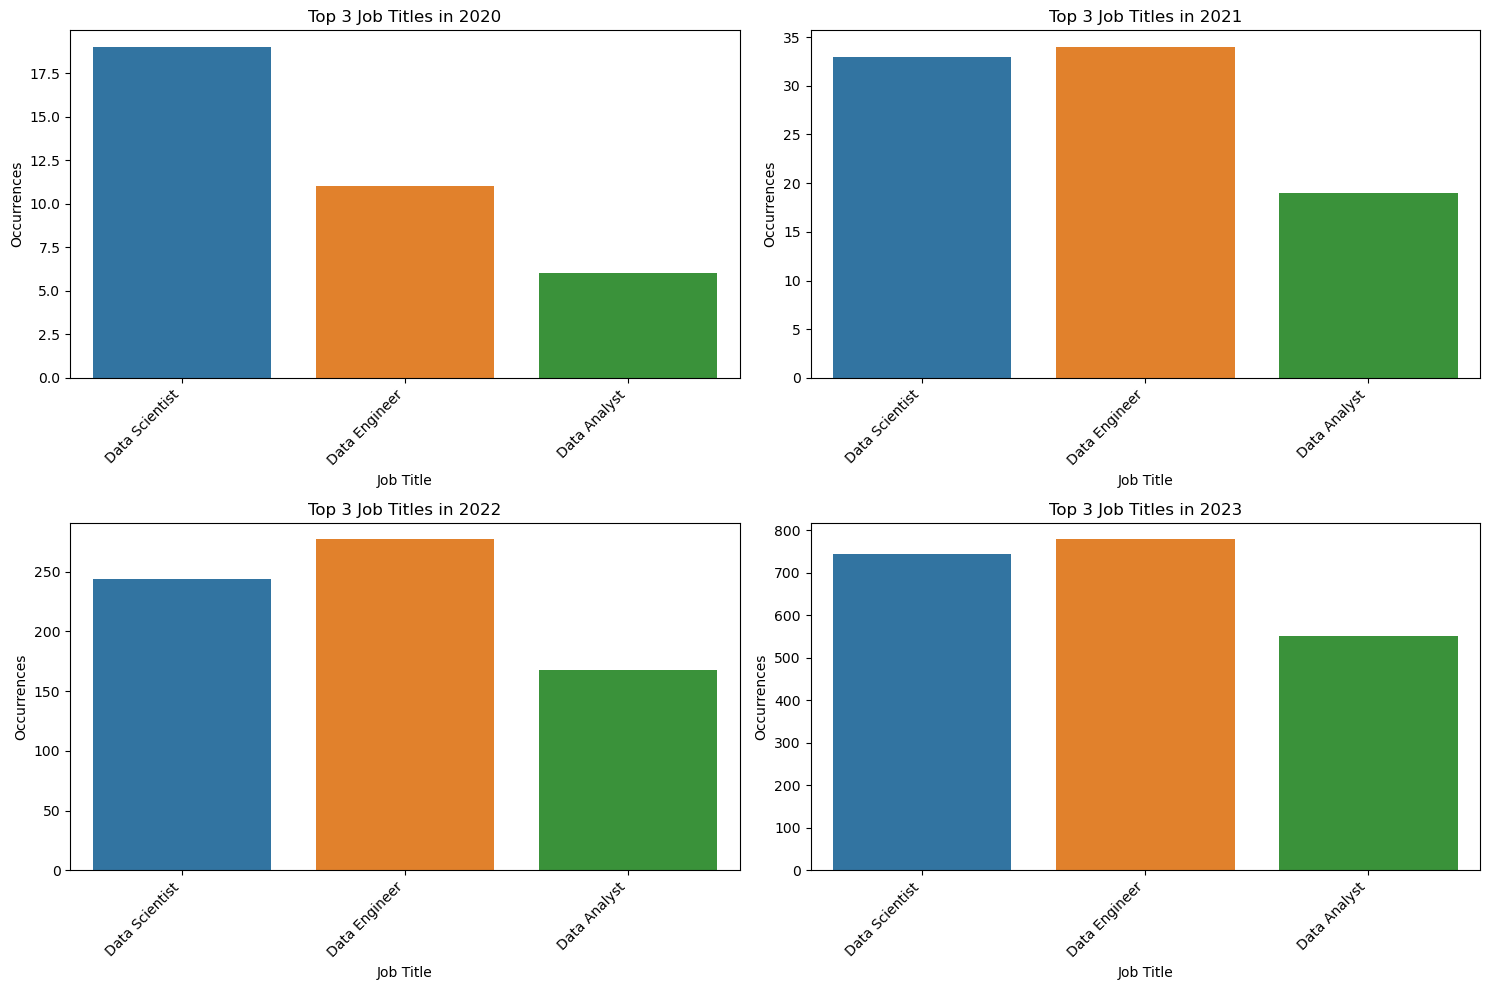

In [58]:
# Find the top 3 most common job titles per year
top_job_titles_per_year = df.groupby('work_year')['job_title'].value_counts().groupby('work_year').head(3)

# Get the unique job titles
unique_job_titles = top_job_titles_per_year.index.get_level_values('job_title').unique()

# Create subplots for the bar graphs
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for ax, (year, data) in zip(axes.flatten(), top_job_titles_per_year.groupby(level=0)):
    sns.barplot(x=data.index.get_level_values('job_title'), y=data.values, order=unique_job_titles, ax=ax)
    ax.set_title(f'Top 3 Job Titles in {year}')
    ax.set_xlabel('Job Title')
    ax.set_ylabel('Occurrences')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

plt.show()

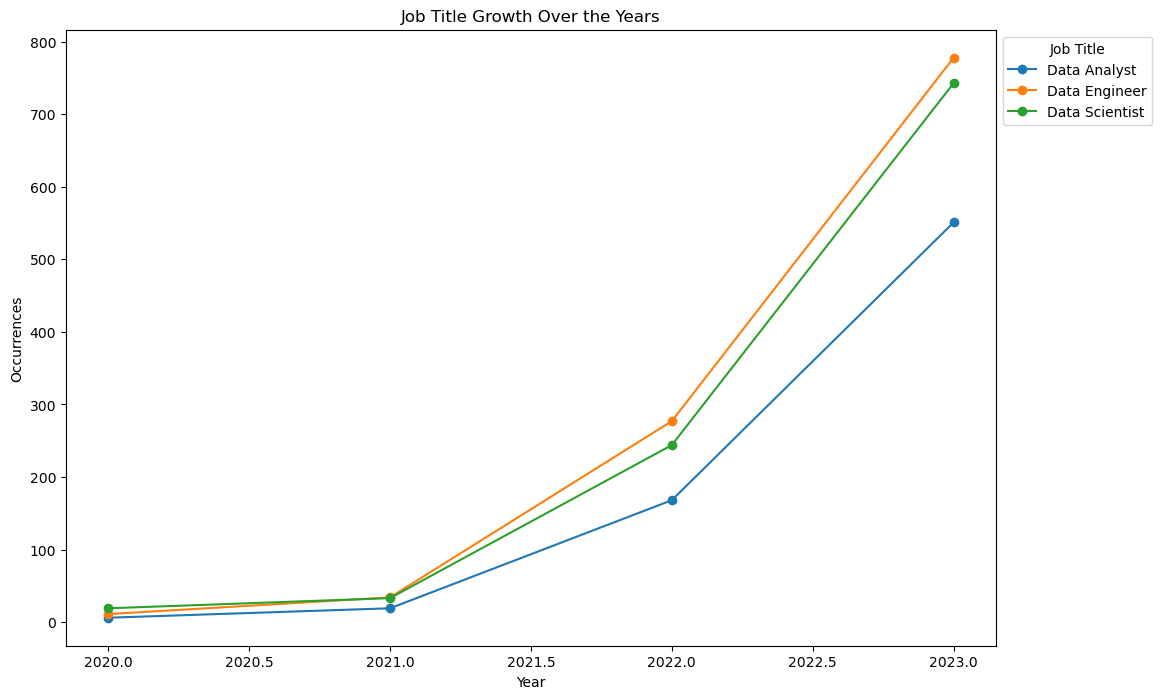

In [59]:
# Line Plot - Job Growth over Years
plt.figure(figsize=(12, 8))
for job_title, data in top_job_titles_per_year.groupby(level=1):
    plt.plot(data.index.get_level_values('work_year'), data.values, marker='o', label=job_title)

plt.title('Job Title Growth Over the Years')
plt.xlabel('Year')
plt.ylabel('Occurrences')
plt.legend(title='Job Title', bbox_to_anchor=(1, 1))
plt.show()

Analysis:
    Top 3 Job Titles per Year:
    The top 3 job titles for each year have been identified based on the occurrences:
    Year 2020:
Data Scientist: 19 occurrences
Data Engineer: 11 occurrences
Data Analyst: 6 occurrences
    Year 2021:
Data Engineer: 34 occurrences
Data Scientist: 33 occurrences
Data Analyst: 19 occurrences
    Year 2022:
Data Engineer: 277 occurrences
Data Scientist: 244 occurrences
Data Analyst: 168 occurrences
    Year 2023:
Data Engineer: 778 occurrences
Data Scientist: 743 occurrences
Data Analyst: 551 occurrences


The occurrence of job titles varies across years, reflecting potential trends and shifts in the industry demand for different roles.
Data Engineer consistently appears as the most common job title over the years.

The analysis provides valuable insights into the distribution of job titles over the years, highlighting Data Engineer and variations in the demand for Data Scientist and Data Analyst roles.

The cleaned dataset is now ready for more in-depth analyses, and the identified trends can help with strategic decisions in hiring and workforce planning.

